# K Means Clustering with Python

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

- Taken from Pierian Data

## Import Libraries

In [142]:
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

## Create some Data

In [129]:
from sklearn.datasets import make_blobs

In [130]:
# Create Data
data = pd.read_csv("jobclassinfo2.csv")

In [131]:
data.head()

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
ID                      66 non-null int64
JobFamily               66 non-null int64
JobFamilyDescription    66 non-null object
JobClass                66 non-null int64
JobClassDescription     66 non-null object
PayGrade                66 non-null int64
EducationLevel          66 non-null int64
Experience              66 non-null int64
OrgImpact               66 non-null int64
ProblemSolving          66 non-null int64
Supervision             66 non-null int64
ContactLevel            66 non-null int64
FinancialBudget         66 non-null int64
PG                      66 non-null object
dtypes: int64(11), object(3)
memory usage: 7.3+ KB


In [133]:
data.describe()

,ID,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,33.500000,7.606061,33.500000,5.696970,3.166667,1.757576,3.348485,3.606061,3.863636,4.757576,5.303030
std,19.196354,4.209436,19.196354,2.517445,1.525005,2.134411,1.767157,1.412894,2.104109,2.468638,3.525597
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,17.250000,4.000000,17.250000,4.000000,2.000000,0.000000,2.000000,3.000000,1.000000,3.000000,2.000000
50%,33.500000,7.000000,33.500000,5.000000,4.000000,1.000000,3.000000,4.000000,4.000000,6.000000,5.000000
75%,49.750000,11.000000,49.750000,8.000000,4.000000,2.750000,4.000000,5.000000,5.750000,7.000000,7.750000
max,66.000000,15.000000,66.000000,10.000000,6.000000,10.000000,6.000000,6.000000,7.000000,8.000000,11.000000


In [134]:
data_kmc = data.drop(['ID', 'JobFamily','JobFamilyDescription', 'JobClass', 'JobClassDescription','OrgImpact','ProblemSolving','Supervision','ContactLevel','FinancialBudget','PG'], axis=1)
data_kmc.head()

,PayGrade,EducationLevel,Experience
0,5,3,1
1,6,4,1
2,8,4,2
3,10,5,5
4,1,1,0


## Visualize Data

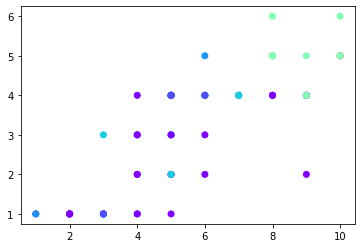

In [135]:
plt.scatter(data_kmc["PayGrade"],data_kmc["EducationLevel"],c=data_kmc["Experience"],cmap='rainbow')

In [136]:
kmeans = KMeans(n_clusters=4)

In [137]:
klist = list(zip(data_kmc.PayGrade, data_kmc.EducationLevel))
kmeans.fit(klist)
clist= data_kmc.to_numpy()

In [138]:
kmeans.cluster_centers_

array([[8.94736842, 4.57894737],
       [5.68421053, 4.        ],
       [2.30769231, 1.        ],
       [4.53333333, 2.2       ]])

In [139]:
kmeans.labels_

array([3, 1, 0, 0, 2, 2, 2, 1, 1, 3, 3, 0, 3, 1, 0, 0, 2, 2, 3, 3, 3, 0,
       0, 2, 3, 1, 3, 1, 0, 2, 2, 1, 1, 2, 3, 3, 0, 2, 3, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 3, 3, 3, 0, 2, 1, 1, 0, 0])

In [140]:
klist = np.asarray(klist)

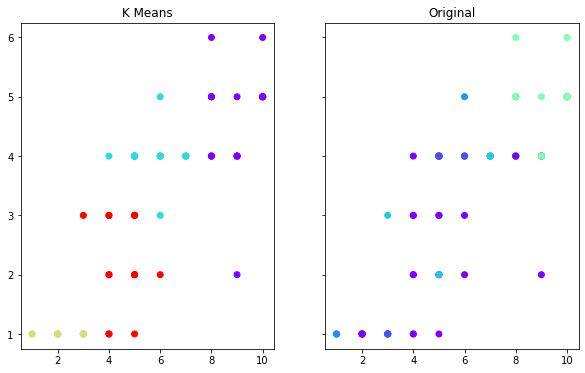

In [141]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(klist[:,0],klist[:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(klist[:,0],klist[:,1],c=clist[:,2],cmap='rainbow')